# kNN from scratch!
This will test your understanding of the kNN algorithm. You will implement the kNN algorithm from scratch and use it to classify an artificial dataset.
It will also test your understanding of python programming. 
Use the class skeleton to implement the kNN algorithm and the test function to test your implementation.
## 1.1. Implement two distance metrics
## 1.1.1 Implement the manhattan distance as a function of two numpy arrays
## 1.1.2 Implement the euclidean distance as a function of two numpy arrays
## 1.2. Implement the kNN algorithm
## Bonus: Implement the class in a way, so you can choose which of the two metrics to use



In [13]:
import numpy as np
import matplotlib.pyplot as plt


class KNN:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        if distance not in ['manhattan', 'euclidean']:
            raise ValueError("Invalid distance metric")
        self.distances = {'manhattan': self.manhattan_distance, 'euclidean': self.euclidean_distance}[distance]
        self.x = None
        self.y = None

    def manhattan_distance(self, x1: np.array, x2: np.array):
        return np.sum(np.abs(x1 - x2))

    def euclidean_distance(self, x1: np.array, x2: np.array):
        return np.sum(np.abs((x1 - x2)**2))

    def fit(self, X, y):
        self.x = X
        self.y = y


    def predict(self, X_test):
        result = []
        for x in X_test:
            result.append(self._predict_single(x))
        return result

    def _predict_single(self, x):
        distances = []
        for t in self.x:
            distances.append(self.distances(x, t))
        index = np.argsort(distances)[:self.k]
        ys = [self.y[i] for i in index]
        return max(ys, key=ys.count)
    
    def plot_data(self, data, expected_labels, predicted_labels):
        plt.scatter(data[:, 0], data[:, 1], c=expected_labels, cmap='coolwarm', label='True values', marker='o')
        plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='coolwarm', label='Predictions', marker='x')
        plt.legend()
        plt.title("Comparison of True Values and Predictions")
        plt.show()

    

In [14]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.60, random_state=0,)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

0.9


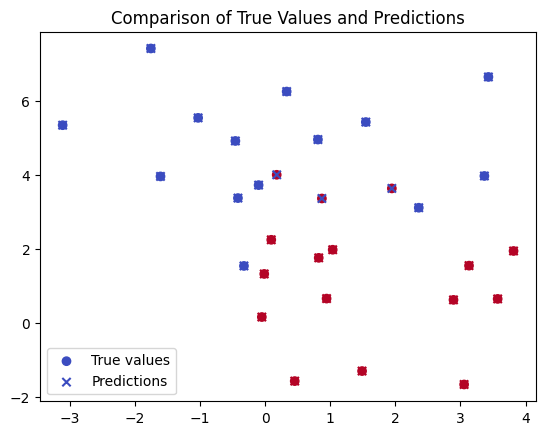

In [16]:
knn = KNN(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
knn.plot_data(X_test, y_test, predictions)